In [1]:
%cd /home/yejin/data/projects/yejin/VerbCentric_RIS/ReferFormer

/data/projects/yejin/VerbCentric_RIS/ReferFormer


/home/yejin/.conda/envs/referformer/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# /data2/projects/chaeyun/VerbCentric_RIS/refer 그대로 받아가서 아래 셀들 실행.

from refer import refer

# TODO (우선순위 순서대로 정리.)
# refcocog umd split : dataset='refcocog', splitBy='umd' - 500개 # ~ 화 
# refcocog google split : dataset='refcocog', splitBy='google' - 500개 ~ 목 정오?
# refcoco : dataset='refcoco', splitBy='unc' - min 300개
# refcoco+ : dataset='refcoco+', splitBy='unc' - min 300개

rr = refer.REFER(dataset='refcocog', splitBy='umd') 
ref_ids = rr.getRefIds(split='train')
print(len(ref_ids))
print(len(rr.Imgs))
print(len(rr.imgToRefs))
print(len(rr.sentToRef))

loading dataset refcocog into memory...
creating index...
index created.
DONE (t=8.65s)
42226
25799
25799
95010


### Multi-category object info json 저장 (각자 작업하는 디렉토리에서 1번만 하면 됨).
- Vip server 의 경우 /data2/projects/chaeyun/VerbCentric_RIS/multi_object_data.json 셀 실행 안하고 이거 그대로 쓰면 됨

In [ ]:
matching_ref_ids = []
ref_ids = rr.getRefIds(split='test')

for ref_id in ref_ids:
    ref = rr.loadRefs(ref_id)[0]  
    img_id = ref['image_id']  
    category_id = ref['category_id'] 

    # Count the number of objects in the image that belong to the same category as ref
    category_counts = 0
    for ref_in_img in rr.imgToRefs[img_id]:
        if ref_in_img['category_id'] == category_id:
            category_counts += 1

    if category_counts > 1 :
        matching_ref_ids.append(ref_id)

print("Number of matching ref IDs:", len(matching_ref_ids))


In [ ]:
import json

multi_object_data = {}

for ref_id in matching_ref_ids:
    ref = rr.loadRefs(ref_id)[0]
    img_id = ref['image_id']
    
    if img_id not in multi_object_data:
        multi_object_data[img_id] = {}
    
    multi_object_data[img_id][ref_id] = {}
    for sent in ref['sentences']:
        sent_id = sent['sent_id']
        sentence_text = sent['sent']
        
        multi_object_data[img_id][ref_id][sent_id] = sentence_text

# Sort multi_object_data by image_id
sorted_multi_object_data = dict(sorted(multi_object_data.items()))

with open('multi_object_data.json', 'w') as f:
    json.dump(sorted_multi_object_data, f, indent=4)


### Ref ID 모으기

98 {'2396': 'a brown couch in a living room', '2397': 'chair'}
2370 {'54260': 'the brown sofa next to the lamp , across the room from the television', '54261': 'the couch sits empty behind the coffee table'}


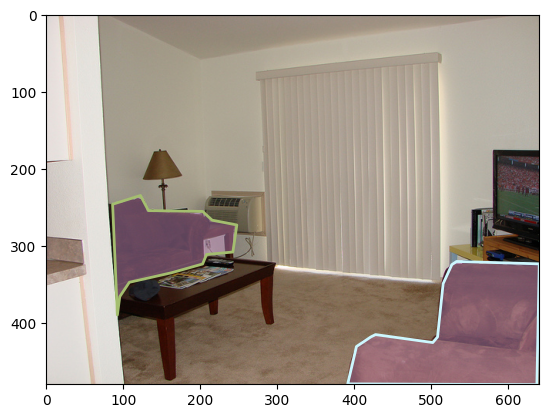

Button(description='Next', style=ButtonStyle())

In [3]:
import json
json_path = "/data2/projects/chaeyun/VerbCentric_RIS/multi_object_data.json"
with open(json_path, "r") as f :
    json_data = json.load(f)

# part 1 : 채윤
# part 2 : 승훈
# part 3 : 승주
# part 4 : 예진

data_keys = list(json_data.keys())
data_keys.sort()
total_len = len(data_keys)  # 1462

part_size = total_len // 4
remainder = total_len % 4

part1_start = 0
part1_end = part_size + (1 if remainder > 0 else 0)
part2_start = part1_end
part2_end = part2_start + part_size + (1 if remainder > 1 else 0)
part3_start = part2_end
part3_end = part3_start + part_size + (1 if remainder > 2 else 0)
part4_start = part3_end
part4_end = total_len

part1 = data_keys[part1_start:part1_end]
part2 = data_keys[part2_start:part2_end]
part3 = data_keys[part3_start:part3_end]
part4 = data_keys[part4_start:part4_end]

#print(f"Part 1: {len(part1)} items")
#print(f"Part 2: {len(part2)} items")
#print(f"Part 3: {len(part3)} items")
#print(f"Part 4: {len(part4)} items")


import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output

def review_images(json_data, indices, rr):
    iter_ = 0
    
    def show_image(index):
        nonlocal iter_
        if iter_ >= len(indices):
            print("Reviewed all images")
            return
        
        img_items = json_data[indices[iter_]]
        plt.figure()
        for ref_id, sents in img_items.items():
            print(ref_id, sents)
            rr.showRef(rr.Refs[int(ref_id)])
        plt.show()
        
        iter_ += 1
    
    def on_button_clicked(b):
        clear_output(wait=True)
        show_image(iter_)
        if iter_ < len(indices):
            display(button)
    
    button = widgets.Button(description="Next")
    button.on_click(on_button_clicked)
    
    show_image(0)  
    display(button)


indices = part4 # 각자 맡았던 파트!
review_images(json_data, indices, rr)

### Ref id txt -> json

In [4]:
# from refer import refer
import json
# rr = refer.REFER(dataset='refcocog', splitBy='umd')

idxlist ='/home/yejin/data/projects/yejin/VerbCentric_RIS/ReferFormer/make_refcoco/refcocog_umd/part4_ref_id.txt'
index_list = []
with open(idxlist, 'r') as file:
    for line in file:
        index_list.append(int(line.strip()))

output_data = {}
for ref in rr.loadRefs(index_list) :
    ref_id = ref['ref_id'] 
    output_data[ref_id] = {}
    for sent in ref['sentences'] :
        output_data[ref_id][sent['sent_id']] = sent['sent']


# with open('/home/yejin/data/projects/yejin/VerbCentric_RIS/ReferFormer/make_refcoco/needrevision_refid_part4.json', 'w') as json_file:
#     json.dump(output_data, json_file, indent=4)

### Ref ID 모으기 셀 시각화 결과 참고해서 Json file 수정하면 됨.

- Format : 
```
{
    ref_id : {
    (motion, sent_id) : sentence,
    (static, sent_id) : sentence}
}
```

#### Before revision

- data takes the form of 'ref_id' : {sent_id : sentence, sent_id : sentence} ..

```
{
    "1939": {
        "44227": "a man in white shorts with an event smock and dark jacket",
        "44228": "a man holding a grey umbrella following a woman"
    },
    "4952": {
        "90168": "a person driving a bike with a pillion rider sitting behind",
        "90169": "a person driving a black motorcycle with another person sitting behind them"
    },
    "1977": {
        "45097": "woman in wedding gown cutting a cake",
        "45098": "a woman that is cutting a cake while wearing a dress"
    },
    "3980": {
        "91174": "woman with sunglasses and a black shirt carrying kid on her back at zoo",
        "91175": "a brown haired woman wearing a black shirt and an infant carrier with a baby in it standing in front of giraffes"
    },
    "4868": {
        "70727": "woman in center",
        "70728": "a woman in a black and pink jacket reaching for an item on a table"
    },
    "5019": {
        "103845": "the lady is putting chili on the meat ball sandwich",
        "103846": "a girl was cooking the food and serving"
    },
    "1992": {
        "45388": "man on left",
        "45389": "a man in a checked jacket"
    },
    "4303": {
        "99563": "a woman holding a knife and a fork in her hands at the table",
        "99564": "a person holding a knife and fork"
    },
    "2007": {
        "45876": "holstein laying on the ground",
        "45877": "a cow laying down in grass"
    },
    ...
}
```


#### After Revision

- data takes the form of 'ref_id' : { ('motion', 'sent_id') : sentence, ('static', 'sent_id') : sentence }...

```
{
    "1939": {
    
        "(motion, 44228)": "a person holding a grey umbrella following another person",
        "(static, 44227)": "a person in white shorts with an event smock and dark jacket"
    },
    "4952": {
        "(motion, 90168)": "a person driving a bike",
        "(static, 90169)": "a person in front of another person"
    },
    "1977": {
        "(motion, 45097)": "person cutting a cake",
        "(static, 45098)": "person wearing a dress"
    },
    "3980": {
        "(motion, 91174)": "person carrying another person on one's back at zoo",
        "(static, 91175)": "a brown haired person wearing a black shirt and sunglasses"
    },
    "4868": {
        "(motion, 70727)": "woman reaching for an item on a table",
        "(static, 70728)": "a woman in a black and pink jacket"
    },
    "5019": {
        "(motion, 103845)": "the woman is putting chili on the meat ball sandwich",
        "(static, 103846)": "a woman wearing blue shirt and black apron"
    },
    "1992": {
        "(motion, 45388)": "person is looking down at his pizza",
        "(static, 45389)": "a person in a checked jacket"
    },
    "4303": {
        "(motion, 99563)": "a person holding a knife and a fork in her hands at the table",
        "(static, 99564)": "a person in light gray hoodie"
    },
    "2007": {
        "(motion, 45876)": "cow laying on the ground",
        "(static, 45877)": "right cow"
    },
    ...
}
```

1679 {'37582': 'a blurry individual with a baseball glove on', '37583': 'a blurred man'}
4048 {'92810': 'player holding bat with number 18 on his back', '92811': 'a person wearing a black cap'}


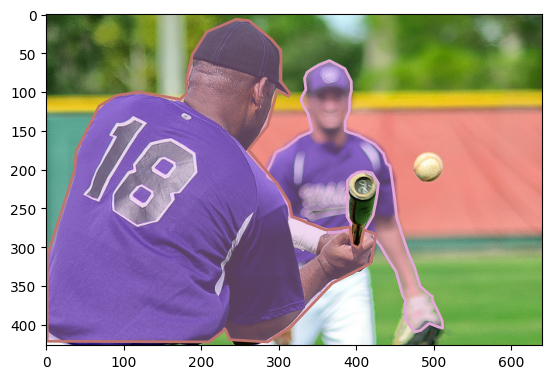

Button(description='Next', style=ButtonStyle())

In [5]:
def review_needrevision_images(indices, needrevision_index_list):
    iter_ = 0
    needrevision_idx = 1

    def show_image(needrevision_id):
        nonlocal iter_

        while needrevision_id not in [int(i) for i in json_data[indices[iter_]]]:
            iter_ += 1
        
        img_items = json_data[indices[iter_]]
        plt.figure()
        for ref_id, sents in img_items.items():
            print(ref_id, sents)
            rr.showRef(rr.Refs[int(ref_id)])
        plt.show()

    def on_button_clicked(b):
        nonlocal needrevision_idx
        
        clear_output(wait=True)
        need_revision_id = needrevision_index_list[needrevision_idx]
        show_image(need_revision_id)
        if needrevision_idx < len(needrevision_index_list):
            display(button)

        needrevision_idx += 1

    button = widgets.Button(description = "Next")
    button.on_click(on_button_clicked)

    show_image(needrevision_index_list[0])
    display(button)

review_needrevision_images(part4, index_list)

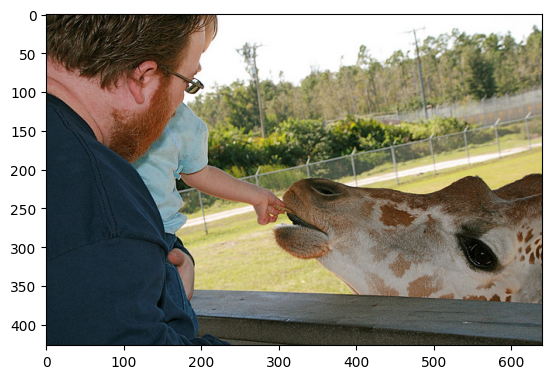

169 {'4002': 'child in blue shirt', '4003': 'a child with a blue shirt feeding a giraffe'}


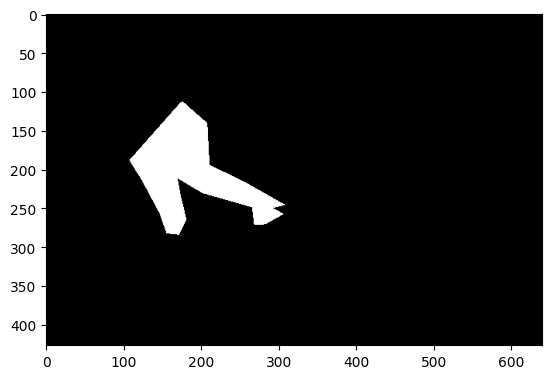

258 {'5988': 'man on the left', '5989': 'a man wearing glasses that is holding a child'}


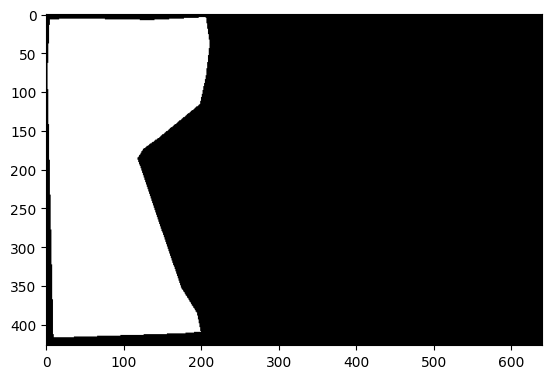

Button(description='Next', style=ButtonStyle())

In [20]:
# 각 object별로 이미지, 마스크 따로
from skimage import io
import os.path as osp

def review_needrevision_images(indices, needrevision_index_list):
    iter_ = 0
    needrevision_idx = 1

    def show_image(needrevision_id):
        nonlocal iter_

        while needrevision_id not in [int(i) for i in json_data[indices[iter_]]]:
            iter_ += 1
        
        img_items = json_data[indices[iter_]]

        plt.figure()
        img_id = rr.getImgIds([int(i) for i in img_items.keys()])
        image = rr.loadImgs(img_id)[0]
        I = io.imread(osp.join(rr.IMAGE_DIR, image['file_name']))
        plt.imshow(I)
        plt.show()
        
        
        for ref_id, sents in img_items.items():
            print(ref_id, sents)
            # rr.showRef(rr.Refs[int(ref_id)])
            plt.imshow(rr.getMask(rr.Refs[int(ref_id)])['mask'], cmap = 'gray')
            plt.show()

    def on_button_clicked(b):
        nonlocal needrevision_idx
        
        clear_output(wait=True)
        need_revision_id = needrevision_index_list[needrevision_idx]
        show_image(need_revision_id)
        if needrevision_idx < len(needrevision_index_list):
            display(button)

        needrevision_idx += 1

    button = widgets.Button(description = "Next")
    button.on_click(on_button_clicked)

    show_image(needrevision_index_list[0])
    display(button)

review_needrevision_images(part4, index_list)


2530 {'57782': 'man playing in ground', '57783': 'the crouching guy with 55 in the right hand picture'}


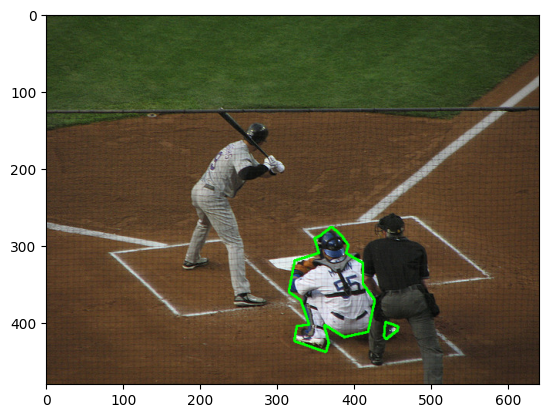

4385 {'101410': 'a coach of baseball players looking a players', '101411': 'an umpire behind the catcher'}


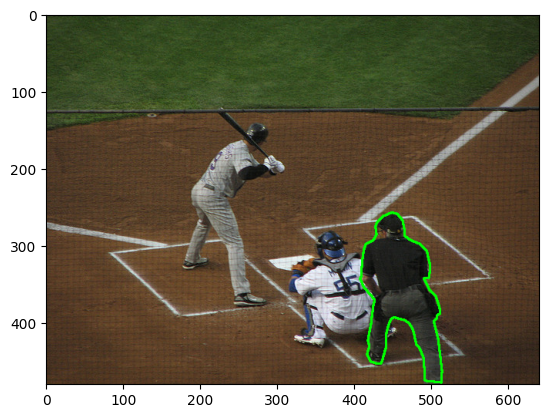

5018 {'102413': 'the batter leaning forward at home plate', '102414': 'the batter'}


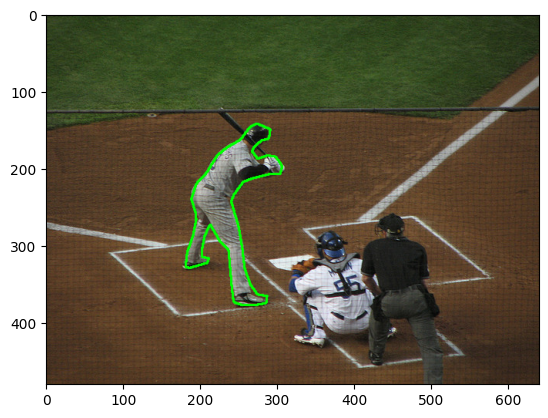

Button(description='Next', style=ButtonStyle())

In [5]:
# 각 object별로 이미지와 마스크 외곽선 같이
from skimage import io
import os.path as osp
import cv2

def review_needrevision_images(indices, needrevision_index_list):
    iter_ = 0
    needrevision_idx = 1

    def show_image(needrevision_id):
        nonlocal iter_

        while needrevision_id not in [int(i) for i in json_data[indices[iter_]]]:
            iter_ += 1
        
        img_items = json_data[indices[iter_]]


        img_id = rr.getImgIds([int(i) for i in img_items.keys()])
        image = rr.loadImgs(img_id)[0]
        I = io.imread(osp.join(rr.IMAGE_DIR, image['file_name']))
        
        for ref_id, sents in img_items.items():
            print(ref_id, sents)
            # rr.showRef(rr.Refs[int(ref_id)])
            plt.figure()
            output_image = I.copy()

            mask = rr.getMask(rr.Refs[int(ref_id)])['mask']
            contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)  # 초록색 외곽선, 두께 2
            
            plt.imshow(output_image)
            plt.show()

    def on_button_clicked(b):
        nonlocal needrevision_idx
        
        clear_output(wait=True)
        need_revision_id = needrevision_index_list[needrevision_idx]
        show_image(need_revision_id)
        if needrevision_idx < len(needrevision_index_list):
            display(button)

        needrevision_idx += 1

    button = widgets.Button(description = "Next")
    button.on_click(on_button_clicked)

    show_image(needrevision_index_list[0])
    display(button)

review_needrevision_images(part4, index_list)

1786 {'40661': 'a man holding a cake that is not wearing a tie', '40662': 'a man in a black suit coat and a white shirt without a tie holding the corner of a birthday cake'}


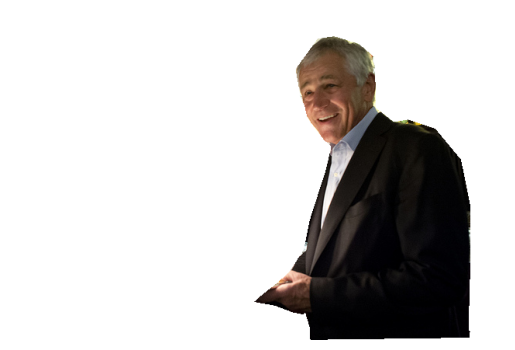

1850 {'42078': 'john kerry looking guy in the red tie', '42079': "a man who is wearing a red color tie and his one hand on other man ' s shoulder"}


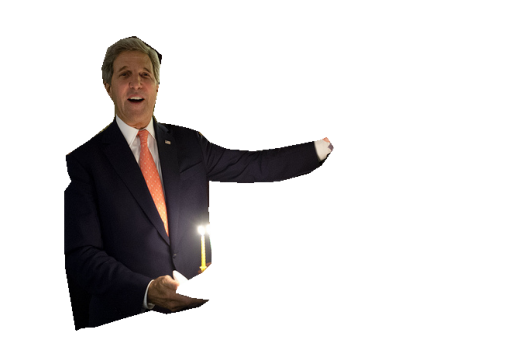

4976 {'95325': 'the man with the glasses on', '95326': 'a man in a tie holding his phone in a room'}


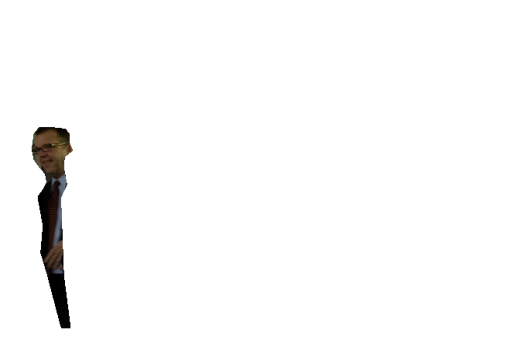

Button(description='Next', style=ButtonStyle())

In [7]:
# 각 object별로 이미지와 마스크 외곽선 같이
from skimage import io
import os.path as osp
import cv2
import numpy as np

def review_needrevision_images(indices, needrevision_index_list):
    iter_ = 0
    needrevision_idx = 1

    def show_image(needrevision_id):
        nonlocal iter_

        while needrevision_id not in [int(i) for i in json_data[indices[iter_]]]:
            iter_ += 1
        
        img_items = json_data[indices[iter_]]


        img_id = rr.getImgIds([int(i) for i in img_items.keys()])
        image = rr.loadImgs(img_id)[0]
        I = io.imread(osp.join(rr.IMAGE_DIR, image['file_name']))
        
        for ref_id, sents in img_items.items():
            print(ref_id, sents)
            # rr.showRef(rr.Refs[int(ref_id)])
            plt.figure()
            output_image = I.copy()

            mask = rr.getMask(rr.Refs[int(ref_id)])['mask']
            
            for c in range(output_image.shape[-1]):
                output_image[..., c] = np.where(mask == 1, output_image[..., c], 255)

            plt.imshow(output_image)
            plt.axis('off')
            plt.show()

    def on_button_clicked(b):
        nonlocal needrevision_idx
        
        clear_output(wait=True)
        need_revision_id = needrevision_index_list[needrevision_idx]
        show_image(need_revision_id)
        if needrevision_idx < len(needrevision_index_list):
            display(button)

        needrevision_idx += 1

    button = widgets.Button(description = "Next")
    button.on_click(on_button_clicked)

    show_image(needrevision_index_list[0])
    display(button)

review_needrevision_images(part4, index_list)

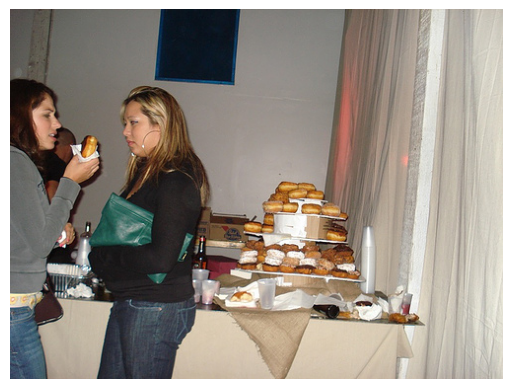

2214 {'50208': 'a young woman with brown hair holding a donut', '50209': 'a women with a donut'}


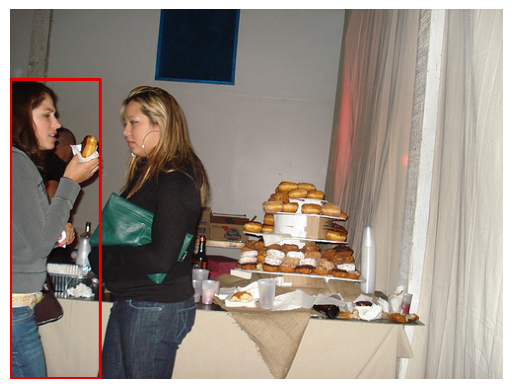

2266 {'51661': 'the lady with black jacket', '51662': 'a woman with blonde hair and a black shirt is standing near a display of donuts'}


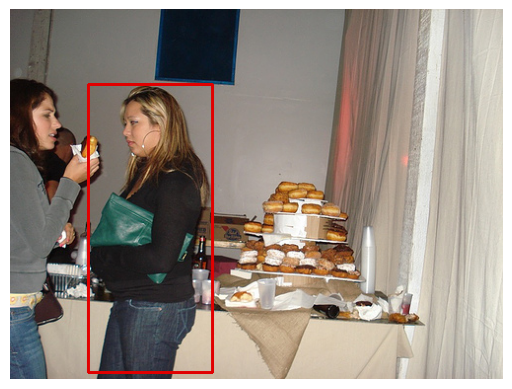

Button(description='Next', style=ButtonStyle())

In [5]:
#bounding box 그리기
# 각 object별로 이미지와 마스크 외곽선 같이
from skimage import io
import os.path as osp
import cv2
import numpy as np

def review_needrevision_images(indices, needrevision_index_list):
    iter_ = 0
    needrevision_idx = 1

    def show_image(needrevision_id):
        nonlocal iter_

        while needrevision_id not in [int(i) for i in json_data[indices[iter_]]]:
            iter_ += 1
        
        img_items = json_data[indices[iter_]]


        img_id = rr.getImgIds([int(i) for i in img_items.keys()])
        image = rr.loadImgs(img_id)[0]
        I = io.imread(osp.join(rr.IMAGE_DIR, image['file_name']))
        plt.figure()
        plt.imshow(I)
        plt.axis('off')
        plt.show()
        
        for ref_id, sents in img_items.items():
            print(ref_id, sents)
            # rr.showRef(rr.Refs[int(ref_id)])
            plt.figure()
            output_image = I.copy()

            mask = rr.getMask(rr.Refs[int(ref_id)])['mask']

            # 마스크에서 바운딩 박스 좌표 계산
            y_indices, x_indices = np.where(mask > 0)  # 마스크가 1인 위치
            x_min, x_max = x_indices.min(), x_indices.max()
            y_min, y_max = y_indices.min(), y_indices.max()
            
            cv2.rectangle(output_image, (x_min, y_min), (x_max, y_max), (225, 0, 0), 2)

            plt.imshow(output_image)
            plt.axis('off')
            plt.show()

    def on_button_clicked(b):
        nonlocal needrevision_idx
        
        clear_output(wait=True)
        need_revision_id = needrevision_index_list[needrevision_idx]
        show_image(need_revision_id)
        if needrevision_idx < len(needrevision_index_list):
            display(button)

        needrevision_idx += 1

    button = widgets.Button(description = "Next")
    button.on_click(on_button_clicked)

    show_image(needrevision_index_list[0])
    display(button)

review_needrevision_images(part4, index_list)

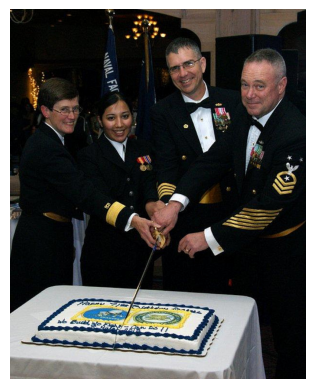

1653 {'36989': 'an older man helping to cut a cake', '36990': 'the man on the far right of the photo'}


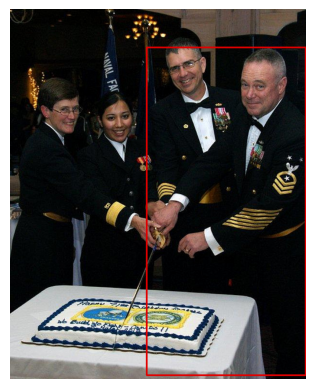

3736 {'85208': 'a girl cutting a cake with a sword near some men', '85209': 'a lady holding the sword'}


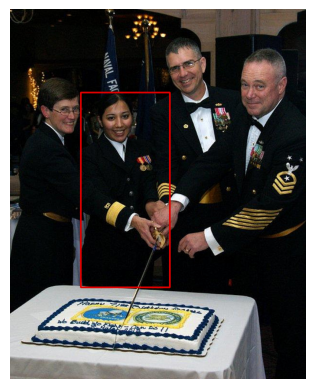

4027 {'92309': 'a man with glass , cutting the cake and standing second from right', '92310': 'an older man with glasses , standing between another man and two women , cutting a cake'}


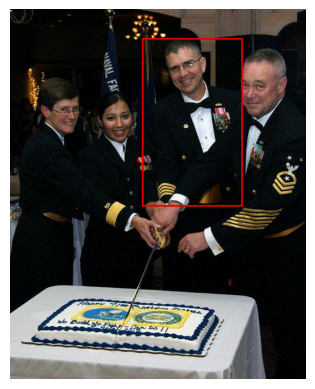

Button(description='Next', style=ButtonStyle())

In [7]:
from skimage import io
import os.path as osp
import numpy as np

def review_images(json_data, indices, rr):
    iter_ = 0
    
    def show_image(index):
        nonlocal iter_
        if iter_ >= len(indices):
            print("Reviewed all images")
            return
        
        img_items = json_data[indices[iter_]]
        
        img_id = rr.getImgIds([int(i) for i in img_items.keys()])
        image = rr.loadImgs(img_id)[0]
        I = io.imread(osp.join(rr.IMAGE_DIR, image['file_name']))

        plt.figure()
        plt.imshow(I)
        plt.axis('off')
        plt.show()

        for ref_id, sents in img_items.items():
            print(ref_id, sents)
            # rr.showRef(rr.Refs[int(ref_id)])
            plt.figure()
            output_image = I.copy()
            mask = rr.getMask(rr.Refs[int(ref_id)])['mask']

            # 마스크에서 바운딩 박스 좌표 계산
            y_indices, x_indices = np.where(mask > 0)  # 마스크가 1인 위치
            x_min, x_max = x_indices.min(), x_indices.max()
            y_min, y_max = y_indices.min(), y_indices.max()
            
            cv2.rectangle(output_image, (x_min, y_min), (x_max, y_max), (225, 0, 0), 2)

            plt.imshow(output_image)
            plt.axis('off')
            plt.show()
        
        iter_ += 1
    
    def on_button_clicked(b):
        clear_output(wait=True)
        show_image(iter_)
        if iter_ < len(indices):
            display(button)
    
    button = widgets.Button(description="Next")
    button.on_click(on_button_clicked)
    
    show_image(0)  
    display(button)


indices = part4 # 각자 맡았던 파트!
review_images(json_data, indices, rr)

In [47]:
#motion, static tag 추가
with open("/home/yejin/data/projects/yejin/VerbCentric_RIS/ReferFormer/make_refcoco/needrevision_refid_part4.json", "r") as file:
    json_data = json.load(file)

    formatted_dict = {}

    for ref_id, sents in json_data.items():
        new_value = {}

        for sent_id in range(len(sents)):
            key = list(sents.keys())[sent_id]

            if sent_id == 0:
                new_key = f"(motion, {key})"
            else:
                new_key = f"(static, {key})"

            new_value[new_key] = sents[key]
        
        formatted_dict[ref_id] = new_value

In [49]:
with open("/home/yejin/data/projects/yejin/VerbCentric_RIS/ReferFormer/make_refcoco/revised_refid_part4.json", "w") as file:
    json.dump(formatted_dict, file, indent=4)

In [51]:
len(formatted_dict)

124